### MLP

> 多层感知机（全连接神经网络）

#### MNIST

In [1]:
from utils import *

# get dataset
def get_dataset(dataset='fashion_mnist'):
    if dataset == 'fashion_mnist':
        (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
    elif dataset == 'mnist':
        (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255
    x_train = x_train.reshape((-1, 28 * 28))
    x_test = x_test.astype('float32') / 255
    x_test = x_test.reshape((-1, 28 * 28))
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = get_dataset()

Using TensorFlow backend.
d:\Anaconda\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\Anaconda\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\Anaconda\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\Anaconda\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Fu

AttributeError: module 'keras.datasets' has no attribute 'fashion_mnist'

In [39]:
x_train.shape, y_train.shape, x_test.shape

((60000, 784), (60000, 10), (10000, 784))

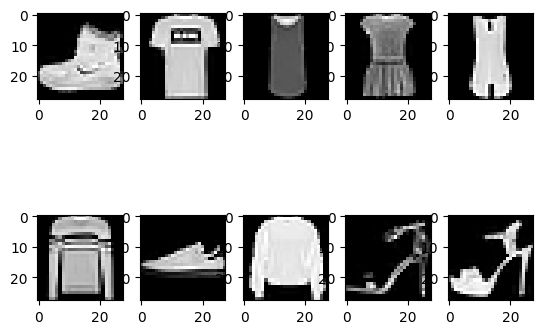

In [41]:
images = (x_train[:10].reshape((-1, 28, 28)) * 255).astype('uint8')
plot_images(images, 2, 5)

In [42]:
def get_mlp_net():
    net = keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
        keras.layers.Dense(10, activation='softmax')
    ])
    net.compile(
        loss=keras.losses.CategoricalCrossentropy(),  # 因为前面使用的是one-hot vector，因此这里需要使用类别的交叉熵损失函数
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="acc"),
        ],
    )
    return net

net = get_mlp_net()

In [43]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
batch_size = 256
epochs = 10
net.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4404 - acc: 0.8501
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4336 - acc: 0.8519
Epoch 3/10
267/469 [================>.............] - ETA: 2s - loss: 0.4315 - acc: 0.8531

KeyboardInterrupt: 

In [6]:
# evaluation
net.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2593 - acc: 0.9289


In [7]:
# save model
net.save('mnist_model.keras')

In [8]:
# load model
new_net = keras.models.load_model('mnist_model.keras')
new_net.summary()
new_net.evaluate(x_test, y_test)  # [loss, accuracy]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 2s 6ms/step - loss: 0.2593 - acc: 0.9289


[0.2593388557434082, 0.9289000034332275]

In [10]:
# prediction
predictions = new_net.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [11]:
predictions.shape  # softmax的输出结果

(10000, 10)

#### 电影评论分类：二分类问题

In [17]:
from utils import *
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

In [15]:
len(train_data[0]), train_labels[0]
# train_data

array([list([1, 6, 675, 7, 300, 127, 24, 895, 8, 2623, 89, 753, 2279, 5, 6866, 78, 14, 20, 9]),
       list([1, 2, 390, 1351, 9, 4, 118, 390, 7, 2, 45, 61, 514, 390, 7, 2]),
       list([1, 13, 586, 851, 14, 31, 60, 23, 2863, 2364, 314]),
       list([1, 14, 20, 9, 394, 21, 12, 47, 49, 52, 302]),
       list([1, 13, 92, 124, 138, 13, 40, 14, 20, 38, 73, 21, 13, 115, 79, 1458, 7, 149, 12]),
       list([1, 1390, 128, 2257, 723, 8965, 60, 48, 25, 28, 296, 12]),
       list([1, 196, 357, 2, 115, 28, 13, 77, 38, 1264, 8, 67, 277, 898, 1686]),
       list([1, 2, 4, 2, 127, 6, 117, 2, 5, 6, 20, 91, 3939]),
       list([1, 14, 9, 4, 6279, 20, 310, 7, 3420, 3394, 1902, 164, 21, 50, 26, 57, 1053, 388]),
       list([1, 2, 390, 1351, 9, 4, 118, 390, 7, 2, 45, 61, 514, 390, 7, 2]),
       list([1, 931, 14, 20, 9, 1167, 9, 394, 55, 6415, 78, 2956, 963, 458, 24, 168]),
       list([1, 6741, 2, 9, 321, 9, 14, 22, 29, 166, 6, 1429, 255]),
       list([1, 57, 931, 379, 20, 116, 856, 42, 433, 881, 57, 

In [5]:
x_train = vectorize_data(train_data, 10000)
x_test =  vectorize_data(test_data, 10000)
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [6]:
x_train[0], y_train[0]

(array([0., 1., 1., ..., 0., 0., 0.]), 1.0)

In [7]:
def get_net():
    net = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(10000,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    net.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy]
    )
    return net

net = get_net()

In [8]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 646337 (2.47 MB)
Trainable params: 646337 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
def train_net(net, 
              epochs: int, 
              batch_size: int, 
              x_train, y_train, 
              x_test=None, y_test=None, val_ratio=None):
    """模型训练"""
    if val_ratio is None:
        history = net.fit(
            x_train,
            y_train,
            epochs=epochs,
            batch_size=batch_size,
        )
    else:
        num_total = len(x_train)
        n_train = int(num_total * (1 - val_ratio))
        part_x_train, x_val = x_train[:n_train], x_train[n_train:]
        part_y_train, y_val = y_train[:n_train], y_train[n_train:]
        history = net.fit(
            part_x_train,
            part_y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_val, y_val)
        )
    acc = None
    if x_test is not None and y_test is not None:
        acc = net.evaluate(x_test, y_test)
    
    return history, acc

In [10]:
history, _ = train_net(net, 
                       epochs=5, 
                       batch_size=512, 
                       x_train=x_train, 
                       y_train=y_train, 
                       x_test=x_test, 
                       y_test=y_test, 
                       val_ratio=0.1)

Epoch 1/5
44/44 [==============================] - 2s 31ms/step - loss: 0.4312 - binary_accuracy: 0.8192 - val_loss: 0.3007 - val_binary_accuracy: 0.8868
Epoch 2/5
44/44 [==============================] - 1s 22ms/step - loss: 0.1969 - binary_accuracy: 0.9258 - val_loss: 0.2916 - val_binary_accuracy: 0.8892
Epoch 3/5
44/44 [==============================] - 1s 22ms/step - loss: 0.1282 - binary_accuracy: 0.9564 - val_loss: 0.3368 - val_binary_accuracy: 0.8852
Epoch 4/5
44/44 [==============================] - 1s 32ms/step - loss: 0.0805 - binary_accuracy: 0.9748 - val_loss: 0.4151 - val_binary_accuracy: 0.8788
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.5429 - binary_accuracy: 0.8604


In [11]:
history.history.keys()

{'loss': [0.431246817111969,
  0.19685186445713043,
  0.1281621903181076,
  0.08050080388784409,
  0.040652792900800705],
 'binary_accuracy': [0.8191555738449097,
  0.925777792930603,
  0.9564444422721863,
  0.9748444557189941,
  0.9895111322402954],
 'val_loss': [0.3007359504699707,
  0.2916014492511749,
  0.3368479013442993,
  0.4150978624820709,
  0.5003382563591003],
 'val_binary_accuracy': [0.8867999911308289,
  0.88919997215271,
  0.885200023651123,
  0.8787999749183655,
  0.8763999938964844]}

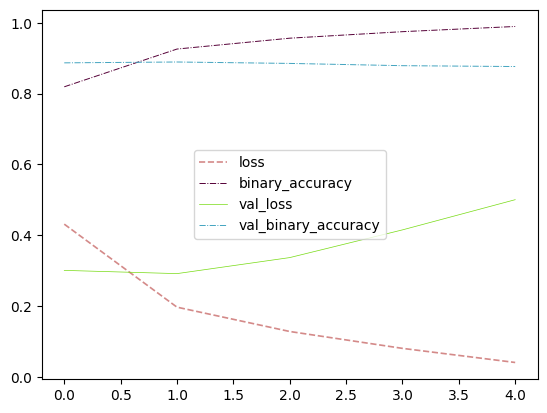

In [12]:
plot_history_dict(history.history)

#### 新闻分类：多分类问题 

In [1]:
from utils import *

(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10000)

In [2]:
# data prcessing
x_train = vectorize_data(train_data, 10000)
x_test =  vectorize_data(test_data, 10000)
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

In [3]:
x_train[0], y_train[0]

(array([0., 1., 1., ..., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
def get_net():
    with tf.device('/gpu:0'):
        net = models.Sequential([
            layers.Input(shape=(10000,)),
            layers.Dense(512, activation='relu'),
            layers.Dense(512, activation='relu'),
            layers.Dense(512, activation='relu'),
            layers.Dense(46, activation='sigmoid')
        ])
        net.compile(
            optimizer=optimizers.Adam(learning_rate=1e-3),
            loss=losses.categorical_crossentropy,  # 多分类交叉熵
            metrics=['accuracy']
        )
    return net

net = get_net()

In [6]:
history, _ = train_net(net, 
                       epochs=10, 
                       batch_size=512, 
                       x_train=x_train, 
                       y_train=y_train, 
                       x_test=x_test, 
                       y_test=y_test, 
                       val_ratio=0.1)

Epoch 1/10
16/16 [==============================] - 2s 122ms/step - loss: 0.0940 - accuracy: 0.9631 - val_loss: 1.2313 - val_accuracy: 0.7953
Epoch 2/10
16/16 [==============================] - 2s 119ms/step - loss: 0.0865 - accuracy: 0.9614 - val_loss: 1.1925 - val_accuracy: 0.7953
Epoch 3/10
16/16 [==============================] - 2s 114ms/step - loss: 0.0804 - accuracy: 0.9655 - val_loss: 1.2402 - val_accuracy: 0.7820
Epoch 4/10
16/16 [==============================] - 2s 109ms/step - loss: 0.0845 - accuracy: 0.9620 - val_loss: 1.1951 - val_accuracy: 0.7964
Epoch 5/10
16/16 [==============================] - 2s 109ms/step - loss: 0.0768 - accuracy: 0.9631 - val_loss: 1.2006 - val_accuracy: 0.8031
Epoch 6/10
16/16 [==============================] - 2s 106ms/step - loss: 0.0744 - accuracy: 0.9642 - val_loss: 1.2414 - val_accuracy: 0.7909
Epoch 7/10
16/16 [==============================] - 2s 107ms/step - loss: 0.0731 - accuracy: 0.9634 - val_loss: 1.2853 - val_accuracy: 0.8009
Epoch 

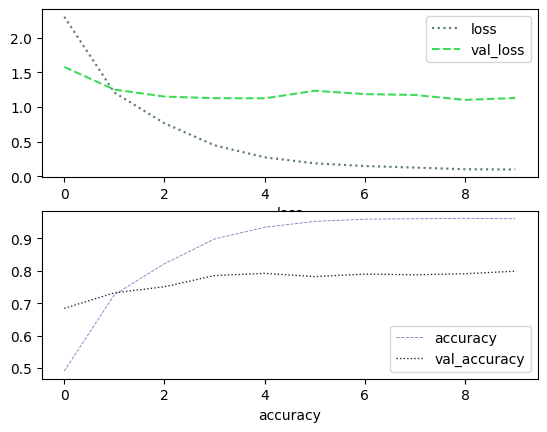

In [19]:
plot_history_dict(history.history)

In [16]:
# prediction and evaluation
predictions = net.predict(x_test)
sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(predictions)

0.7916295636687445

#### 预测房价：回归问题

要点：
- 数据预处理时需要进行normalize处理
- k折交叉验证的实现

In [1]:
from utils import *

(train_data, train_targets), (test_data, test_targets) =  datasets.boston_housing.load_data()

In [2]:
train_data.shape, train_targets.shape

((404, 13), (404,))

In [10]:
def normalize_data(data):
    m = np.mean(data, axis=0)
    s = np.std(data, axis=0)
    return (data - m) / s

train_data = normalize_data(train_data)
test_data = normalize_data(test_data)

train_data[0], test_data[0]

(array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ]),
 array([ 2.8040301 , -0.50784934,  0.96960877, -0.32969024,  1.23174581,
         0.11934137,  1.14739788, -0.91935276,  1.60609286,  1.40778227,
         0.90513041, -4.27829517,  2.51324773]))

In [7]:
def get_built_model(input_shape):
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='relu')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), 
                  loss='mse', 
                  metrics=['mae']
                  )
    return model

In [9]:
input_shape = (train_data.shape[1], )
net = get_built_model(input_shape)
net.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)                │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 64)                │      4,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │         65 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# k-fold validation
input_shape = (train_data.shape[1], )
k = 4
num_val_samples = len(train_data) // k
num_epochs, batch_size = 100, 64
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = get_built_model(input_shape)
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=batch_size, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
# mean of the MAE
np.mean(all_scores)

2.546402871608734

#### 防止模型过拟合

- 减小网络大小
    > 奥卡姆剃刀原则（尽可能用更简单的网络实现相同的效果）
- 权重正则化
- Dropout（可以当成是正则化的一种方法）

### CNN

#### 测试小型数据集：猫狗分类

> 使用 `Data Augmentation` 、 `l2权重正则化` 、`Dropout` 来防止过拟合

In [1]:
import os, shutil
from utils import *
from tqdm import trange

In [2]:
# 图像数据预处理
train_dir = 'F:/GCDownload/dogs-vs-cats/train'
test_dir = 'F:/GCDownload/dogs-vs-cats/test1'
dataset_dir = 'F:/datasets/dogs-vs-cats/'
os.makedirs(dataset_dir, exist_ok=True)

def copy_image(ori_image_path, to_dir=dataset_dir):
    image_name = os.path.basename(ori_image_path)
    label = image_name[:3]
    new_image_name = image_name[4:]
    if label == 'cat':
        new_dir = os.path.join(to_dir, 'cat')
        os.makedirs(new_dir, exist_ok=True)
        shutil.copy(ori_image_path, os.path.join(new_dir, new_image_name))
    else:
        new_dir = os.path.join(to_dir, 'dog')
        os.makedirs(new_dir, exist_ok=True)
        shutil.copy(ori_image_path, os.path.join(new_dir, new_image_name))

In [4]:
image_names = os.listdir(train_dir)
num_cats = num_dogs = 1000
for i in trange(len(image_names)):
    image_name = image_names[i]
    l = copy_image(os.path.join(train_dir, image_name))
    

  1%|          | 157/25000 [00:00<00:50, 491.79it/s]

100%|██████████| 25000/25000 [01:32<00:00, 269.29it/s]


In [3]:
# 图像数据预处理
batch_size = 8
image_size = (150, 150)
rand_seed = 100
train_ds, val_ds = utils.image_dataset_from_directory(
    dataset_dir,
    label_mode='binary',
    batch_size=batch_size,
    image_size=image_size,
    seed=rand_seed,
    validation_split=0.1,
    subset='both'  # split 20% for validation, and return a tuple
)
test_ds = utils.image_dataset_from_directory(
    test_dir,
    labels=None,
    label_mode=None,
    batch_size=batch_size,
    image_size=image_size,
)


Found 2000 files belonging to 2 classes.
Using 1800 files for training.
Using 200 files for validation.
Found 12500 files belonging to 1 classes.


In [6]:
# data shape: (batch_size, height, width, channels)
for data_batch, labels_batch in train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    # print(data_batch[0], labels_batch[0])
    break

data batch shape: (8, 256, 256, 3)
labels batch shape: (8, 1)


In [5]:
img_aug_layers = [
    layers.Rescaling(scale=1./255),  # rescale to 0~1
    layers.RandomRotation(
        (-0.8, 0.8)
    ),  # 随机旋转（-45, 45）
    layers.RandomFlip(),
    layers.RandomTranslation(
        (-0.2, 0.2),
        (-0.2, 0.2),
    ),
    layers.RandomZoom(
        (-0.2, 0.2),
        (-0.2, 0.2),
    ),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(
        0.2,
        value_range=(0, 1)
    ),
]

# 构建卷积网络模型
def get_net():
    model = models.Sequential([
        layers.Input((150, 150, 3)),  # 输入图像的尺寸
        *img_aug_layers,
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  # 添加dropout层
        layers.Dense(512, activation='relu', 
                     kernel_regularizer=regularizers.l2(0.001)),  # 添加l2权重正则化
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])
    return model

net = get_net()
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_translation_1 (Rando  (None, 150, 150, 3)      0         
 mTranslation)                                                   
                                                                 
 random_zoom_1 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
 random_contrast_1 (RandomCo  (None, 150, 150, 3)     

In [6]:
history = net.fit(
      train_ds,
      epochs=5,
      validation_data=val_ds)

Epoch 1/5
225/225 [==============================] - 69s 248ms/step - loss: 1.3001 - acc: 0.5272 - val_loss: 1.0856 - val_acc: 0.5050
Epoch 2/5
 65/225 [=======>......................] - ETA: 45s - loss: 1.0539 - acc: 0.5038

KeyboardInterrupt: 

In [2]:
import numpy as np
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 使用预训练的模型

> 使用了 `imagenet` 的预训练权重的 `VGG16` 网络模型

In [7]:
from utils import *

conv_base = applications.VGG16(weights='imagenet',
                               include_top=False,  # 不包括最后的全连接层头部
                               input_shape=(256, 256, 3))
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [15]:
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizers.Adam(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 23,103,809
Non-trainable params: 0
_________________________________________________________________


d:\Anaconda\envs\dl\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# 图像数据预处理
dataset_dir = 'F:/datasets/dogs-vs-cats/'
batch_size = 8
image_size = (256, 256)
rand_seed = 1626

train_ds, val_ds = utils.image_dataset_from_directory(
    dataset_dir,
    label_mode='binary',
    batch_size=batch_size,
    image_size=image_size,
    seed=rand_seed,
    validation_split=0.1,
    subset='both'  # split 20% for validation, and return a tuple
)
test_ds = utils.image_dataset_from_directory(
    test_dir,
    labels=None,
    label_mode=None,
    batch_size=batch_size,
    image_size=image_size,
    seed=rand_seed
)

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Using 2500 files for validation.
Found 12500 files belonging to 1 classes.


In [16]:
conv_base.trainable = False  # 冻结卷积基
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

  30/2813 [..............................] - ETA: 4:47:19 - loss: 1.6128 - acc: 0.7458

KeyboardInterrupt: 

### 深度学习用于文本和序列

#### 数据预处理

In [7]:
# preprocessing
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
max_features = 1000
max_len = 10
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
matrix = tokenizer.texts_to_matrix(samples)
sequences, matrix

([[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]],
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]))

In [8]:
from utils import *

max_features = 1000
max_len = 20
net = models.Sequential([
    layers.Input((max_len, )),
    layers.Embedding(max_features, 8, input_length=max_len),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
net.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
)

net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             8000      
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.datasets import imdb

# get dataset
(x_train, y_train), (x_test, y_test) = \
                            imdb.load_data(
                                num_words=max_features,
                                maxlen=max_len
                            )

In [11]:
x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [6]:
x_train.shape, x_test.shape

((13, 20), (12, 20))

In [8]:
history = net.fit(x_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.5)

Epoch 1/100
1/1 [==============================] - 1s 756ms/step - loss: 0.6988 - acc: 0.3333 - val_loss: 0.6880 - val_acc: 0.4286
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 0.6936 - acc: 0.3333 - val_loss: 0.6873 - val_acc: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6884 - acc: 0.5000 - val_loss: 0.6865 - val_acc: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6833 - acc: 0.8333 - val_loss: 0.6858 - val_acc: 0.5714
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6782 - acc: 1.0000 - val_loss: 0.6851 - val_acc: 0.5714
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6731 - acc: 1.0000 - val_loss: 0.6844 - val_acc: 0.5714
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6681 - acc: 1.0000 - val_loss: 0.6837 - val_acc: 0.5714
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6630 - acc: 1.0

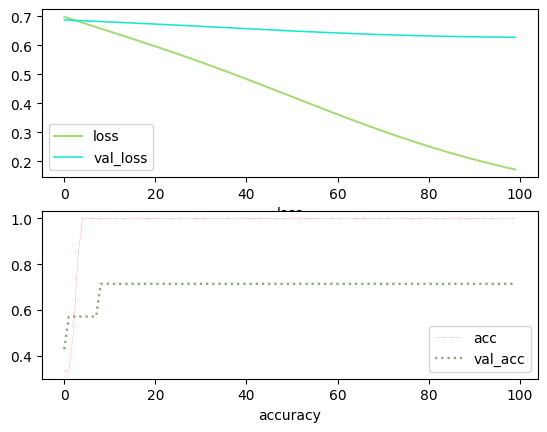

In [9]:
plot_history_dict(history.history, all_labels=[['loss', 'val_loss'], ['acc', 'val_acc']])

#### RNN

In [1]:
from utils import *

max_features = 10000
max_len = 500
net = models.Sequential([
    layers.Embedding(max_features, 32),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

net.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
)

net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.datasets import imdb

# get dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [9]:
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

In [10]:
history = net.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 103ms/step - loss: 2.9093 - acc: 1.5000e-04 - val_loss: 2.6915 - val_acc: 0.0000e+00
Epoch 2/10
157/157 [==============================] - 16s 101ms/step - loss: 2.7134 - acc: 0.0000e+00 - val_loss: 2.6681 - val_acc: 0.0000e+00
Epoch 3/10
157/157 [==============================] - 16s 102ms/step - loss: 2.6936 - acc: 0.0000e+00 - val_loss: 2.6535 - val_acc: 0.0000e+00
Epoch 4/10
157/157 [==============================] - 16s 103ms/step - loss: 2.6815 - acc: 0.0000e+00 - val_loss: 2.6453 - val_acc: 0.0000e+00
Epoch 5/10
157/157 [==============================] - 16s 105ms/step - loss: 2.6775 - acc: 0.0000e+00 - val_loss: 2.6452 - val_acc: 2.0000e-04
Epoch 6/10
157/157 [==============================] - 16s 102ms/step - loss: 2.6908 - acc: 0.0000e+00 - val_loss: 2.6716 - val_acc: 2.0000e-04
Epoch 7/10
157/157 [==============================] - 16s 99ms/step - loss: 2.6891 - acc: 2.0000e-04 - val_loss: 2.6444 - val_acc: 8.0000e-04


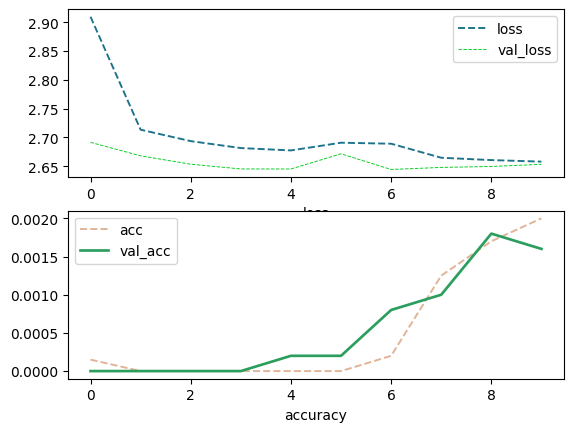

In [13]:
plot_history_dict(history.history, all_labels=[['loss', 'val_loss'], ['acc', 'val_acc']])

#### LSTM

In [3]:
from utils import *

max_features = 10000
max_len = 500
net = models.Sequential([
    layers.Embedding(max_features, 32),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

net.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
)

net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.datasets import imdb

# get dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [16]:
history = net.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 43s 253ms/step - loss: 0.6930 - acc: 0.5045 - val_loss: 0.6940 - val_acc: 0.4938
Epoch 2/10
157/157 [==============================] - 37s 238ms/step - loss: 0.6914 - acc: 0.5027 - val_loss: 0.6915 - val_acc: 0.5114
Epoch 3/10
157/157 [==============================] - 37s 236ms/step - loss: 0.6877 - acc: 0.5275 - val_loss: 0.6927 - val_acc: 0.5068
Epoch 4/10
157/157 [==============================] - 37s 237ms/step - loss: 0.6773 - acc: 0.5332 - val_loss: 0.6919 - val_acc: 0.5186
Epoch 5/10
157/157 [==============================] - 37s 235ms/step - loss: 0.6623 - acc: 0.5403 - val_loss: 0.6952 - val_acc: 0.5208
Epoch 6/10
157/157 [==============================] - 39s 247ms/step - loss: 0.6489 - acc: 0.5408 - val_loss: 0.6993 - val_acc: 0.5070
Epoch 7/10
157/157 [==============================] - 37s 234ms/step - loss: 0.6436 - acc: 0.5427 - val_loss: 0.7031 - val_acc: 0.5204
Epoch 8/10
157/157 [==============================] - 3

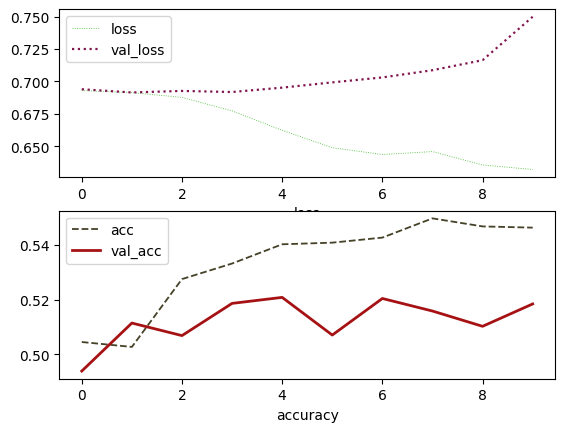

In [17]:
plot_history_dict(history.history, all_labels=[['loss', 'val_loss'], ['acc', 'val_acc']])

#### GRU

> 原理与LSTM相似，但计算复杂度略低，效果略差

#### RNN：温度预测问题

In [1]:
from utils import *

f_path = os.path.join('data/jena_climate_2009_2016.csv')

In [5]:
import pandas as pd

df = pd.read_csv(f_path)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [6]:
# data normalization
def normalize_data(df):
    for col_name, col_data in df.items():
        if isinstance(col_data[0], str): continue
        mean = col_data.mean()
        std = col_data.std()
        df[col_name] = (col_data - mean) / std

normalize_data(df)

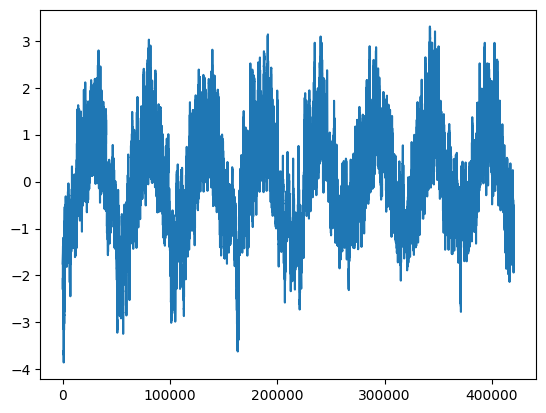

In [21]:
plt.plot(df['T (degC)'])

In [13]:
float_data = np.asarray(df.iloc[:, 1:])

In [14]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [15]:
lookback = 1440
step = 6
delay = 144
batch_size = 128
# 0~200000 作为训练集
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
# 200000~300001 作为验证集
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
# 300001~end 作为测试集
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [24]:
net = models.Sequential([
    layers.Input((None, float_data.shape[-1])),
    layers.GRU(32, 
                dropout=0.2, 
                recurrent_dropout=0.2,  # 循环dropout
                return_sequences=True),
    layers.GRU(64, 
                dropout=0.1, 
                recurrent_dropout=0.5),
    layers.Dense(1)
])
net.compile(
    optimizer='adam', 
    loss='mae',
    metrics=['mse']
)
net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, None, 32)          4608      
                                                                 
 gru_7 (GRU)                 (None, 64)                18816     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23,489
Trainable params: 23,489
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = net.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20


F:\Temp\ipykernel_20816\2699179837.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = net.fit_generator(train_gen,


500/500 [==============================] - 250s 487ms/step - loss: 0.3442 - mse: 0.1950 - val_loss: 0.3045 - val_mse: 0.1512
Epoch 2/20
500/500 [==============================] - 291s 582ms/step - loss: 0.3235 - mse: 0.1711 - val_loss: 0.2952 - val_mse: 0.1431
Epoch 3/20
 25/500 [>.............................] - ETA: 4:09 - loss: 0.3219 - mse: 0.1698

KeyboardInterrupt: 

#### 双向RNN

In [26]:
from utils import *

max_features = 10000
max_len = 500
net = models.Sequential([
    layers.Embedding(max_features, 32),
    layers.Bidirectional(
        layers.GRU(32,
                   dropout=0.2,
                   recurrent_dropout=0.5),
    ),
    layers.Dense(1, activation='sigmoid')
])

net.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
)

net.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12672     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 332,737
Trainable params: 332,737
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.datasets import imdb

# get dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [28]:
history = net.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 320s 2s/step - loss: 0.6251 - acc: 0.6213 - val_loss: 0.4979 - val_acc: 0.7818
Epoch 2/10
 71/157 [============>.................] - ETA: 2:38 - loss: 0.4061 - acc: 0.8289

KeyboardInterrupt: 

In [ ]:
plot_history_dict(history.history, all_labels=[['loss', 'val_loss'], ['acc', 'val_acc']])

#### CNN+RNN：处理序列数据

In [29]:
from keras.datasets import imdb

# get dataset
max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [30]:
from utils import *

net = models.Sequential([
    layers.Embedding(max_features, 32),
    layers.Conv1D(32, 7, activation='relu'),  # 1D卷积层
    layers.MaxPooling1D(5),  # 1D汇聚层
    layers.Conv1D(32, 7, activation='relu'),
    layers.Bidirectional(
        layers.GRU(32,
                   dropout=0.2,
                   recurrent_dropout=0.5),
    ),
    layers.Dense(1, activation='sigmoid')
])

net.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
)

net.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          7200      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          7200      
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12672     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                

In [31]:
history = net.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 66s 319ms/step - loss: 0.5602 - acc: 0.6796 - val_loss: 0.3376 - val_acc: 0.8682
Epoch 2/10
  3/157 [..............................] - ETA: 38s - loss: 0.2989 - acc: 0.8828

KeyboardInterrupt: 

In [ ]:
plot_history_dict(history.history, all_labels=[['loss', 'val_loss'], ['acc', 'val_acc']])

### Keras的高级使用

#### 函数式API构建多模态网络

> 当需要多模态输入或输出时，`models.Sequential()` 构建的序列网络无法满足

![image.png](./assets\Snipaste_2024-02-17_11-58-11.png)

In [11]:
from keras import layers, models, losses, metrics
 
input_tensor = layers.Input((32, ))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='sigmoid')(x)
model = models.Model(input_tensor, output_tensor)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      


                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 2,442
Trainable params: 2,442
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    optimizer='adam',
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()]
)


In [14]:
import numpy as np

# prepare dataset
x_train = np.random.random((1000, 32))
y_train = np.random.random((1000, 10))
history = model.fit(
    x_train, y_train, 
    epochs=50, 
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
1/7 [===>..........................] - ETA: 0s - loss: 19.4044 - categorical_accuracy: 0.0625

7/7 [==============================] - 0s 36ms/step - loss: 20.0065 - categorical_accuracy: 0.1037 - val_loss: 21.5010 - val_categorical_accuracy: 0.1050
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 22.5363 - categorical_accuracy: 0.1088 - val_loss: 24.5716 - val_categorical_accuracy: 0.1200
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 25.8505 - categorical_accuracy: 0.1112 - val_loss: 28.3136 - val_categorical_accuracy: 0.1300
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 29.7576 - categorical_accuracy: 0.1138 - val_loss: 32.4629 - val_categorical_accuracy: 0.1350
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 33.9832 - categorical_accuracy: 0.1175 - val_loss: 36.8891 - val_categorical_accuracy: 0.1250
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 38.5531 - categorical_accuracy: 0.1213 - val_loss: 41.6932 - val_categorical_accuracy: 0.1300
Epoch 7/50
7/7 [==========

#### 多输入模型

![](./assets\Snipaste_2024-02-17_16-31-45.png)

In [16]:
from keras import layers, models, losses, metrics
 
text_vocab_size, question_vocab_size, answer_vocab_size = 10000, 10000, 500
text_input = layers.Input((None, ), name='text')
embedded_text = layers.Embedding(text_vocab_size, 64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)
question_input = layers.Input(shape=(None,), name='question')
embedded_question = layers.Embedding(question_vocab_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)
concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)  # 合并feature_map
answer = layers.Dense(answer_vocab_size, activation='softmax')(concatenated)

model = models.Model([text_input, question_input], answer)
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 question (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 64)     640000      ['text[0][0]']                   
                                                                                                  
 embedding_3 (Embedding)        (None, None, 32)     320000      ['question[0][0]']               
                                                                                            

#### 多输出模型

![](./assets\Snipaste_2024-02-17_16-41-28.png)

### 生成式深度学习

#### 生成序列数据：LSTM

In [1]:
from utils import *

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

Corpus length: 600893


In [2]:
text[:20]

'preface\n\n\nsupposing '

In [20]:
def data_preprocessing(text, maxlen, step):
    sentences = []
    next_chars = []
    for i in  range(0, len(text) - maxlen, step):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
    chars = sorted(list(set(text)))
    char_indices = dict((char, chars.index(char)) for char in chars)
    x = np.zeros((len(sentences), maxlen, len(chars)))
    y = np.zeros((len(sentences), len(chars)))
    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1
    return x, y, chars, char_indices

maxlen = 60
step = 3
x, y, chars, char_indices = data_preprocessing(text, maxlen, step)

In [21]:
x[0], y[0], chars

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]),
 ['\n',
  ' ',
  '!',
  '"',
  "'",
  '(',
  ')',
  ',',
  '-',
  '.',
  '0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  ':',
  ';',
  '=',
  '?',
  '[',
  ']',
  '_',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z',
  'ä',
  'æ',
  'é',
  'ë'])

In [10]:
model = models.Sequential([
    layers.Input((maxlen, len(chars))),
    layers.LSTM(128),
    layers.Dense(len(chars), activation='softmax')
])
model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizers.Adam(1e-2)
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               95232     
                                                                 
 dense (Dense)               (None, 57)                7353      
                                                                 
Total params: 102,585
Trainable params: 102,585
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 采样，添加temperature因子
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)  # 各项和为1
    probas = np.random.multinomial(1, preds, 1)  # 多项分布
    # print(preds, probas)
    return np.argmax(probas)

In [24]:
sample([0.1, 0.2, 0.3, 0.3, 0.1], 0.5)

3

In [25]:
import random
import sys

for epoch in range(1, 60):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(x, y,
              batch_size=128,
              epochs=1)

    # 随机选取一段文本作为生成器的seed text
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

epoch 1
1565/1565 [==============================] - 124s 79ms/step - loss: 1.6400
--- Generating with seed: "ical
observation--is among the means whereby the burden of l"
------ temperature: 0.2
ical
observation--is among the means whereby the burden of life of the sense of the passion to the general the mense the man and the partion of the same the barthing and the passion and conception of the menses the sensition of the passion of the man in the menses the man of the menses the most another and the sensition of the passion of the passion, the delight of the sensition of the same one of the conduct the condition, the sense of the condition of th
------ temperature: 0.5
 the conduct the condition, the sense of the condition of the profound of deringsian
has particism the present
suppary and soural belongs of the sentious mensting and that men and platence man our to the man that it is not be does the contempt to be result place the precisely and such was fart the
suffering and can li

KeyboardInterrupt: 

#### 生成图像数据：DeepDream

In [26]:
from keras.applications import inception_v3

model = inception_v3.InceptionV3(weights='imagenet', include_top=False)

d:\Anaconda\envs\dl\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [27]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

#### VAE

In [2]:
# data preprocessing
from utils import *

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

Corpus length: 600893


'preface\n\n\nsupposing that truth is a woman--what then? is there not ground\nfor suspecting that all philosophers, in so far as they have been\ndogmatists, have failed to understand women--that the terrible\nseriousness and clumsy importunity with which they have usually paid\ntheir addresses to truth, have been unskilled and unseemly methods for\nwinning a woman? certainly she has never allowed herself to be won; and\nat present every kind of dogma stands with sad and discouraged mien--if,\nindeed, it stands at all! for there are scoffers who maintain that it\nhas fallen, that all dogma lies on the ground--nay more, that it is at\nits last gasp. but to speak seriously, there are good grounds for hoping\nthat all dogmatizing in philosophy, whatever solemn, whatever conclusive\nand decided airs it has assumed, may have been only a noble puerilism\nand tyronism; and probably the time is at hand when it will be once\nand again understood what has actually sufficed for the basis of such\

In [3]:
def data_preprocessing(text, maxlen, step):
    sentences = []
    next_chars = []
    for i in  range(0, len(text) - maxlen, step):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
    chars = sorted(list(set(text)))
    char_indices = dict((char, chars.index(char)) for char in chars)
    x = np.zeros((len(sentences), maxlen, len(chars)))
    y = np.zeros((len(sentences), len(chars)))
    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1
    return x, y, chars, char_indices

maxlen = 60
step = 3
x, y, chars, char_indices = data_preprocessing(text, maxlen, step)

In [5]:
len(chars)

57

In [ ]:
max_features = 
encoder = models.Sequential([
    layers.Input(),
    layers.Embedding()
])

#### GAN